# AI vs Human art classification
This project is done as part of the Context Aware Security Analytics In Computer Vision 2023/2024 course

Supervised by **Carmen Bisogni**

By **Zakarya Boudraf**, **Mohammed Aziz Khitmi** and **Melissa Ould Braham**

## Now we fit the model on all styles at once

In [15]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os

### listing the training then the testing directories 

In [16]:
top_dir = '../input/Real_AI_SD_LD_Dataset/'

# Define the training paths
train_dir = os.path.join(top_dir, 'train')

# List all directories in the train directory
all_directories = os.listdir(train_dir)

# Initialize lists to store directories for human-drawn and AI-generated images
train_human = []
train_ai = []

# Loop through all directories
for directory in all_directories:
    # Check if the directory represents human-drawn images
    if not directory.startswith('AI_'):
        train_human.append(os.path.join(train_dir, directory))
    # Check if the directory represents AI-generated images
    else:
        train_ai.append(os.path.join(train_dir, directory))

# Print the lists of directories
print("Train directories containing human-drawn images:")
for i, directory in enumerate(train_human):
    print(f"{i}. {directory}")

print("\nTrain directories containing AI-generated images:")
for i, directory in enumerate(train_ai):
    print(f"{i}. {directory}")

Train directories containing human-drawn images:
0. ../input/Real_AI_SD_LD_Dataset/train/impressionism
1. ../input/Real_AI_SD_LD_Dataset/train/renaissance
2. ../input/Real_AI_SD_LD_Dataset/train/surrealism
3. ../input/Real_AI_SD_LD_Dataset/train/art_nouveau
4. ../input/Real_AI_SD_LD_Dataset/train/baroque
5. ../input/Real_AI_SD_LD_Dataset/train/expressionism
6. ../input/Real_AI_SD_LD_Dataset/train/romanticism
7. ../input/Real_AI_SD_LD_Dataset/train/ukiyo_e
8. ../input/Real_AI_SD_LD_Dataset/train/post_impressionism
9. ../input/Real_AI_SD_LD_Dataset/train/realism

Train directories containing AI-generated images:
0. ../input/Real_AI_SD_LD_Dataset/train/AI_SD_impressionism
1. ../input/Real_AI_SD_LD_Dataset/train/AI_LD_post_impressionism
2. ../input/Real_AI_SD_LD_Dataset/train/AI_LD_art_nouveau
3. ../input/Real_AI_SD_LD_Dataset/train/AI_LD_surrealism
4. ../input/Real_AI_SD_LD_Dataset/train/AI_LD_ukiyo-e
5. ../input/Real_AI_SD_LD_Dataset/train/AI_LD_romanticism
6. ../input/Real_AI_SD_LD_Data

In [17]:
# Define the test paths
test_dir = os.path.join(top_dir, 'test')

# List all directories in the test directory
all_directories = os.listdir(test_dir)

# Initialize lists to store directories for human-drawn and AI-generated images
test_human = []
test_ai = []

# Loop through all directories
for directory in all_directories:
    # Check if the directory represents human-drawn images
    if not directory.startswith('AI_'):
        test_human.append(os.path.join(test_dir, directory))
    # Check if the directory represents AI-generated images
    else:
        test_ai.append(os.path.join(test_dir, directory))

# Print the lists of directories
print("Test directories containing human-drawn images:")
for i, directory in enumerate(test_human):
    print(f"{i}. {directory}")

print("\nTest directories containing AI-generated images:")
for i, directory in enumerate(test_ai):
    print(f"{i}. {directory}")

Test directories containing human-drawn images:
0. ../input/Real_AI_SD_LD_Dataset/test/impressionism
1. ../input/Real_AI_SD_LD_Dataset/test/renaissance
2. ../input/Real_AI_SD_LD_Dataset/test/surrealism
3. ../input/Real_AI_SD_LD_Dataset/test/art_nouveau
4. ../input/Real_AI_SD_LD_Dataset/test/baroque
5. ../input/Real_AI_SD_LD_Dataset/test/expressionism
6. ../input/Real_AI_SD_LD_Dataset/test/romanticism
7. ../input/Real_AI_SD_LD_Dataset/test/ukiyo_e
8. ../input/Real_AI_SD_LD_Dataset/test/post_impressionism
9. ../input/Real_AI_SD_LD_Dataset/test/realism

Test directories containing AI-generated images:
0. ../input/Real_AI_SD_LD_Dataset/test/AI_SD_impressionism
1. ../input/Real_AI_SD_LD_Dataset/test/AI_LD_post_impressionism
2. ../input/Real_AI_SD_LD_Dataset/test/AI_LD_art_nouveau
3. ../input/Real_AI_SD_LD_Dataset/test/AI_LD_surrealism
4. ../input/Real_AI_SD_LD_Dataset/test/AI_LD_ukiyo-e
5. ../input/Real_AI_SD_LD_Dataset/test/AI_LD_romanticism
6. ../input/Real_AI_SD_LD_Dataset/test/AI_LD_bar

# Ranking the styles from easiest to hardest to classify 
1. Realism
1. Renaissance
1. Ukiyo-e
1. Baroque
1. Post-Impressionism
1. Impressionism
1. Romanticism
1. Expressionism
1. Surrealism
1. Art Nouveau

# Model for Classifying AI-Generated images on all styles
## First we list the training data

In [18]:
# Print the lists of directories
print("Test directories containing human-drawn images:")
for i, directory in enumerate(test_human):
    print(f"{i}. {directory}")

print("\nTest directories containing AI-generated images:")
for i, directory in enumerate(test_ai):
    print(f"{i}. {directory}")

Test directories containing human-drawn images:
0. ../input/Real_AI_SD_LD_Dataset/test/impressionism
1. ../input/Real_AI_SD_LD_Dataset/test/renaissance
2. ../input/Real_AI_SD_LD_Dataset/test/surrealism
3. ../input/Real_AI_SD_LD_Dataset/test/art_nouveau
4. ../input/Real_AI_SD_LD_Dataset/test/baroque
5. ../input/Real_AI_SD_LD_Dataset/test/expressionism
6. ../input/Real_AI_SD_LD_Dataset/test/romanticism
7. ../input/Real_AI_SD_LD_Dataset/test/ukiyo_e
8. ../input/Real_AI_SD_LD_Dataset/test/post_impressionism
9. ../input/Real_AI_SD_LD_Dataset/test/realism

Test directories containing AI-generated images:
0. ../input/Real_AI_SD_LD_Dataset/test/AI_SD_impressionism
1. ../input/Real_AI_SD_LD_Dataset/test/AI_LD_post_impressionism
2. ../input/Real_AI_SD_LD_Dataset/test/AI_LD_art_nouveau
3. ../input/Real_AI_SD_LD_Dataset/test/AI_LD_surrealism
4. ../input/Real_AI_SD_LD_Dataset/test/AI_LD_ukiyo-e
5. ../input/Real_AI_SD_LD_Dataset/test/AI_LD_romanticism
6. ../input/Real_AI_SD_LD_Dataset/test/AI_LD_bar

# Labeling the training data

In [19]:
# Initialize lists to store file paths and labels
filepaths = []
labels = []

# Initialize an empty DataFrame for train_data
train_data = pd.DataFrame(columns=['filepath', 'label'])

# Label files under train_human as "human"
for directory in train_human:
    for file in os.listdir(directory):
        filepath = os.path.join(directory, file)
        filepaths.append(filepath)
        labels.append("human")

# Label files under train_ai as "AI"
for directory in train_ai:
    for file in os.listdir(directory):
        filepath = os.path.join(directory, file)
        filepaths.append(filepath)
        labels.append("AI")

# Create a DataFrame with file paths and labels
data = pd.DataFrame({'filepath': filepaths, 'label': labels})

# Concatenate data with train_data
train_data = pd.concat([train_data, data], ignore_index=True)

In [20]:
train_data

,filepath,label
0,../input/Real_AI_SD_LD_Dataset/train/impressio...,human
1,../input/Real_AI_SD_LD_Dataset/train/impressio...,human
2,../input/Real_AI_SD_LD_Dataset/train/impressio...,human
3,../input/Real_AI_SD_LD_Dataset/train/impressio...,human
4,../input/Real_AI_SD_LD_Dataset/train/impressio...,human
...,...,...
155010,../input/Real_AI_SD_LD_Dataset/train/AI_LD_imp...,AI
155011,../input/Real_AI_SD_LD_Dataset/train/AI_LD_imp...,AI
155012,../input/Real_AI_SD_LD_Dataset/train/AI_LD_imp...,AI
155013,../input/Real_AI_SD_LD_Dataset/train/AI_LD_imp...,AI


### We split the training data into training and validation subsets (80/20)

In [21]:
from sklearn.model_selection import train_test_split

train_data, validation_data = train_test_split(train_data, test_size=0.2)

In [22]:
train_data

,filepath,label
149163,../input/Real_AI_SD_LD_Dataset/train/AI_SD_sur...,AI
83294,../input/Real_AI_SD_LD_Dataset/train/AI_LD_bar...,AI
97884,../input/Real_AI_SD_LD_Dataset/train/AI_SD_uki...,AI
72952,../input/Real_AI_SD_LD_Dataset/train/AI_LD_uki...,AI
127925,../input/Real_AI_SD_LD_Dataset/train/AI_SD_bar...,AI
...,...,...
64878,../input/Real_AI_SD_LD_Dataset/train/AI_LD_art...,AI
67332,../input/Real_AI_SD_LD_Dataset/train/AI_LD_sur...,AI
103653,../input/Real_AI_SD_LD_Dataset/train/AI_LD_ren...,AI
125379,../input/Real_AI_SD_LD_Dataset/train/AI_SD_bar...,AI


In [23]:
validation_data

,filepath,label
24433,../input/Real_AI_SD_LD_Dataset/train/baroque/p...,human
12931,../input/Real_AI_SD_LD_Dataset/train/surrealis...,human
63169,../input/Real_AI_SD_LD_Dataset/train/AI_LD_art...,AI
87486,../input/Real_AI_SD_LD_Dataset/train/AI_LD_exp...,AI
60754,../input/Real_AI_SD_LD_Dataset/train/AI_LD_art...,AI
...,...,...
25506,../input/Real_AI_SD_LD_Dataset/train/expressio...,human
131856,../input/Real_AI_SD_LD_Dataset/train/AI_SD_exp...,AI
59741,../input/Real_AI_SD_LD_Dataset/train/AI_LD_pos...,AI
93701,../input/Real_AI_SD_LD_Dataset/train/AI_SD_pos...,AI


In [24]:
# Count the number of files under each label
file_counts = train_data['label'].value_counts()

# Print the counts
print("Number of files under each label:")
print(file_counts)

Number of files under each label:
label
AI       84045
human    39967
Name: count, dtype: int64


In [25]:
# Initialize lists to store file paths and labels
filepaths = []
labels = []

# Initialize an empty DataFrame for test_data
test_data = pd.DataFrame(columns=['filepath', 'label'])

# Label files under test_human as "human"
for directory in test_human:
    for file in os.listdir(directory):
        filepath = os.path.join(directory, file)
        filepaths.append(filepath)
        labels.append("human")

# Label files under test_ai as "AI"
for directory in test_ai:
    for file in os.listdir(directory):
        filepath = os.path.join(directory, file)
        filepaths.append(filepath)
        labels.append("AI")

# Create a DataFrame with file paths and labels
data = pd.DataFrame({'filepath': filepaths, 'label': labels})

# Concatenate data with test_data
test_data = pd.concat([test_data, data], ignore_index=True)

In [26]:
test_data

,filepath,label
0,../input/Real_AI_SD_LD_Dataset/test/impression...,human
1,../input/Real_AI_SD_LD_Dataset/test/impression...,human
2,../input/Real_AI_SD_LD_Dataset/test/impression...,human
3,../input/Real_AI_SD_LD_Dataset/test/impression...,human
4,../input/Real_AI_SD_LD_Dataset/test/impression...,human
...,...,...
29995,../input/Real_AI_SD_LD_Dataset/test/AI_LD_impr...,AI
29996,../input/Real_AI_SD_LD_Dataset/test/AI_LD_impr...,AI
29997,../input/Real_AI_SD_LD_Dataset/test/AI_LD_impr...,AI
29998,../input/Real_AI_SD_LD_Dataset/test/AI_LD_impr...,AI


In [27]:
# Count the number of files under each label
file_counts = test_data['label'].value_counts()

# Print the counts
print("Number of files under each label:")
print(file_counts)

Number of files under each label:
label
AI       20000
human    10000
Name: count, dtype: int64


### Creating the Training and Validation sets

In [28]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.utils import image_dataset_from_directory

training_generator = ImageDataGenerator(rescale=1./255,   # to normalize pixel value
                                       # rotation_range=7, # it will apply rotations to the image
                                       # horizontal_flip=True, # it will flip image horizontally
                                       # zoom_range=0.2  # it will increase and decrease zoom by 0.2x
                                       )
train_dataset = training_generator.flow_from_dataframe(
    dataframe=train_data,
    x_col='filepath',  # Column containing file paths
    y_col='label',     # Column containing labels
    target_size=(32, 32),
    batch_size=64,
    class_mode='categorical',
    shuffle=True
)

Found 124012 validated image filenames belonging to 2 classes.


In [29]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.utils import image_dataset_from_directory

validation_generator = ImageDataGenerator(rescale=1./255,   # to normalize pixel value
                                       # rotation_range=7, # it will apply rotations to the image
                                       # horizontal_flip=True, # it will flip image horizontally
                                       # zoom_range=0.2  # it will increase and decrease zoom by 0.2x
                                       )
validation_dataset = validation_generator.flow_from_dataframe(
    dataframe=validation_data,
    x_col='filepath',  # Column containing file paths
    y_col='label',     # Column containing labels
    target_size=(32, 32),
    batch_size=64,
    class_mode='categorical',  
    shuffle=True
)

Found 31003 validated image filenames belonging to 2 classes.


In [30]:
train_dataset.class_indices

{'AI': 0, 'human': 1}

### Creating the Test set

In [31]:
test_generator = ImageDataGenerator(rescale=1./255)
test_dataset = test_generator.flow_from_dataframe(  dataframe=test_data,
                                                    x_col='filepath',  # Column containing file paths
                                                    y_col='label',     # Column containing labels
                                                    target_size = (32, 32),
                                                    batch_size = 1,    # 1 image at a time to evaluate the NN
                                                    class_mode = 'categorical',
                                                    shuffle = False)   # to associate the prediction with expected output

test_dataset.class_indices

Found 30000 validated image filenames belonging to 2 classes.


{'AI': 0, 'human': 1}

### Building the neural network

In [23]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential()
def build_vgg19(input_shape=(32, 32, 3), num_classes=2):
    
    # Block 1
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=input_shape))
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2)))
    
    # Block 2
    model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2)))
    
    # Block 3
    model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2)))
    
    # Block 4
    model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
    model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
    model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
    model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2)))
    
    # Block 5
    model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
    model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
    model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
    model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2)))
    
    # Fully connected layers
    model.add(Flatten())
    model.add(Dense(4096, activation='relu'))
    model.add(Dense(4096, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    
    return model

# Build the VGG19 model
vgg19_model = build_vgg19(input_shape=(32, 32, 3), num_classes=2)

# Compile the model
vgg19_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Display the model summary
vgg19_model.summary()


/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_16 (Conv2D)              │ (None, 32, 32, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 32, 32, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 16, 16, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_20 (Conv2D)              │ (None, 8, 8, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_21 (Conv2D)              │ (None, 8, 8, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_22 (Conv2D)              │ (None, 8, 8, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ (None, 8, 8, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_24 (Conv2D)              │ (None, 4, 4, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_25 (Conv2D)              │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_26 (Conv2D)              │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_27 (Conv2D)              │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_28 (Conv2D)              │ (None, 2, 2, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_29 (Conv2D)              │ (None, 2, 2, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_30 (Conv2D)              │ (None, 2, 2, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_31 (Conv2D)              │ (None, 2, 2, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 1, 1, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4096)           │     2,101,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 2)              │         8,19

 Total params: 38,915,138 (148.45 MB)

 Trainable params: 38,915,138 (148.45 MB)

 Non-trainable params: 0 (0.00 B)

### We fit the model to the data (we implement checkpointing to save the weights of the maximum val_acc model)

In [24]:
import os

# Create the directory if it doesn't exist
os.makedirs('../working/models', exist_ok=True)

# The rest of your code goes here


In [25]:
from keras.callbacks import ModelCheckpoint

checkpoint_filepath = '../working/models/checkpoint.model.keras'
model_checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_filepath,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

# Model is saved at the end of every epoch, if it's the best seen so far.

In [26]:
import time

# Initial epoch count
epochs = 5

# Initialize total training time
total_training_time = 0


# Record start time
start_time = time.time()

# Fit the model for the specified number of epochs
history = model.fit(train_dataset, epochs=epochs, validation_data=validation_dataset, callbacks=[model_checkpoint_callback])

# Calculate training time for the current batch of epochs
training_time = time.time() - start_time

# Print total training time
print("Total training time so far: {:.2f} seconds".format(training_time))


Epoch 1/5


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1938/1938 ━━━━━━━━━━━━━━━━━━━━ 6454s 3s/step - accuracy: 0.6754 - loss: 0.7124 - val_accuracy: 0.6778 - val_loss: 0.6296
Epoch 2/5
1938/1938 ━━━━━━━━━━━━━━━━━━━━ 6403s 3s/step - accuracy: 0.6776 - loss: 0.6292 - val_accuracy: 0.6778 - val_loss: 0.6294
Epoch 3/5
1938/1938 ━━━━━━━━━━━━━━━━━━━━ 7235s 4s/step - accuracy: 0.6785 - loss: 0.6283 - val_accuracy: 0.6778 - val_loss: 0.6290
Epoch 4/5
1938/1938 ━━━━━━━━━━━━━━━━━━━━ 7479s 4s/step - accuracy: 0.6761 - loss: 0.6302 - val_accuracy: 0.6778 - val_loss: 0.6286
Epoch 5/5
1938/1938 ━━━━━━━━━━━━━━━━━━━━ 7449s 4s/step - accuracy: 0.6793 - loss: 0.6279 - val_accuracy: 0.6778 - val_loss: 0.6290
Total training time so far: 35021.71 seconds


### Evaluating the network

In [27]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

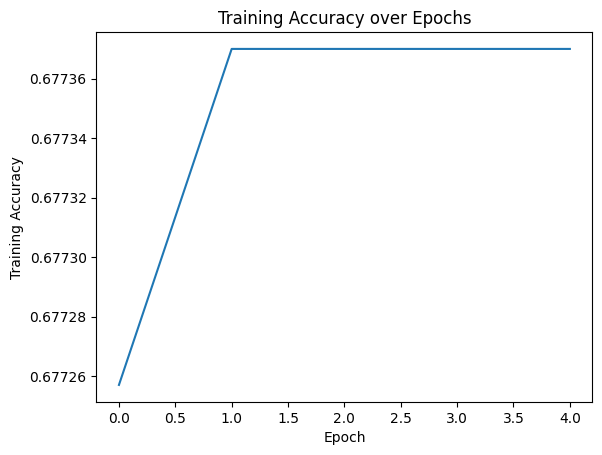

In [28]:
from matplotlib import pyplot as plt

plt.plot(history.history['accuracy']);
plt.xlabel('Epoch')
plt.ylabel('Training Accuracy')
plt.title('Training Accuracy over Epochs')
plt.show()

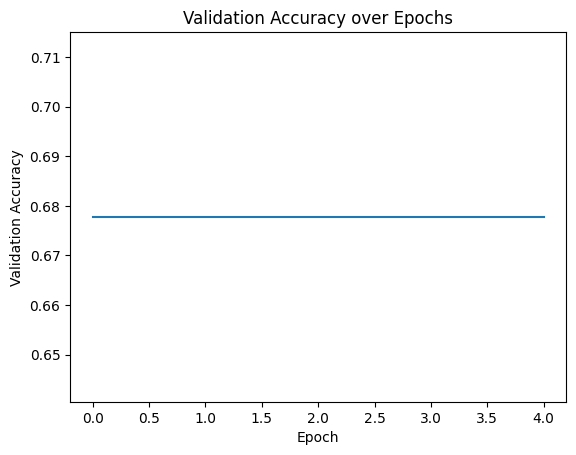

In [29]:
from matplotlib import pyplot as plt

plt.plot(history.history['val_accuracy']);
plt.xlabel('Epoch')
plt.ylabel('Validation Accuracy')
plt.title('Validation Accuracy over Epochs')
plt.show()

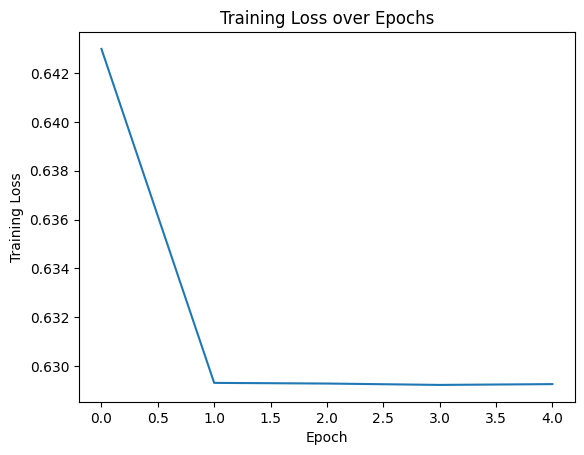

In [30]:
plt.plot(history.history['loss']);
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.title('Training Loss over Epochs')
plt.show()

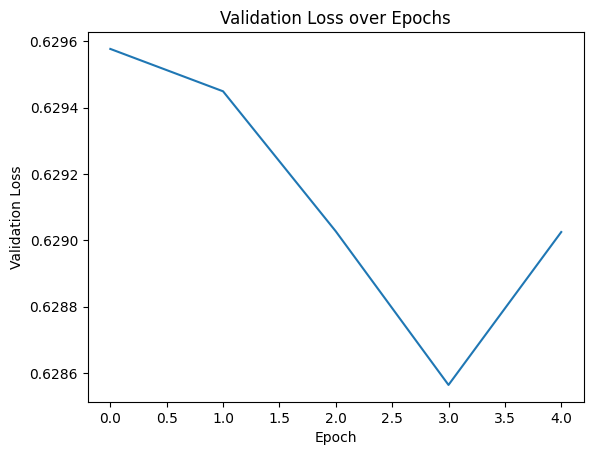

In [31]:
plt.plot(history.history['val_loss']);
plt.xlabel('Epoch')
plt.ylabel('Validation Loss')
plt.title('Validation Loss over Epochs')
plt.show()

## Reviewing the results
We notice from the graphs of our first approach that our models need more epochs to stablize.

In [32]:
# The model weights (that are considered the best) can be loaded as -
model.load_weights(checkpoint_filepath)

In [33]:
predictions = model.predict(test_dataset)
predictions

30000/30000 ━━━━━━━━━━━━━━━━━━━━ 715s 24ms/step


array([[0.84336287, 0.1566372 ],
       [0.84336287, 0.1566372 ],
       [0.84336287, 0.1566372 ],
       ...,
       [0.84336287, 0.1566372 ],
       [0.84336287, 0.1566372 ],
       [0.84336287, 0.1566372 ]], dtype=float32)

In [34]:
test_dataset.class_indices

{'AI': 0, 'human': 1}

In [35]:
predictions = np.argmax(predictions, axis = 1)
predictions

array([0, 0, 0, ..., 0, 0, 0])

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.67      1.00      0.80     20000
           1       0.00      0.00      0.00     10000

    accuracy                           0.67     30000
   macro avg       0.33      0.50      0.40     30000
weighted avg       0.44      0.67      0.53     30000



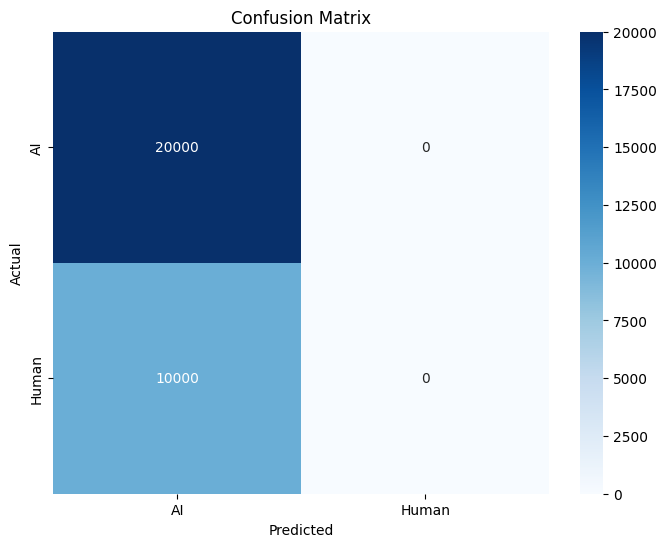

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

# Calculate confusion matrix and classification report
cm = confusion_matrix(test_dataset.classes, predictions)
report = classification_report(test_dataset.classes, predictions)

# Define custom labels for the axes
labels = ['AI', 'Human']
cm_df = pd.DataFrame(cm, index=labels, columns=labels)

# Plot confusion matrix using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')

# Add labels to the axes
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

# Print classification report
print(report)

# Show the plot
plt.show()

In [32]:
from keras.models import Sequential
from keras.layers import Rescaling, Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Activation, Dropout
from keras.metrics import Precision, Recall

from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

model_2 = Sequential()
model_2.add(Conv2D(filters = 512, kernel_size = 3, input_shape = (32,32,3), activation='relu'))
model_2.add(MaxPooling2D())
model_2.add(Conv2D(filters = 128, kernel_size = 3, activation='relu'))
model_2.add(MaxPooling2D())
model_2.add(Conv2D(filters = 32, kernel_size = 3, activation='relu'))
model_2.add(MaxPooling2D())
model_2.add(Flatten())
# MLP
# adding the first hidden layer 
model_2.add(Dense(units = 32, activation = 'relu', input_dim = 64))

# adding the second hidden layer 
model_2.add(Dense(units = 16, activation = 'relu'))

# adding the output layer 
model_2.add(Dense(units = 2, activation = 'softmax')) 

model_2.compile(optimizer = 'adam', loss = 'binary_crossentropy' , metrics = ['accuracy'] )  

model_2.summary()

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 512)    │        14,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 128)    │       589,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 32)       │        36,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 2, 2, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │            34 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 645,874 (2.46 MB)

 Trainable params: 645,874 (2.46 MB)

 Non-trainable params: 0 (0.00 B)

In [33]:
from keras.callbacks import ModelCheckpoint

checkpoint_filepath = '../working/models/checkpoint.model_2.keras'
model_checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_filepath,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

# Model is saved at the end of every epoch, if it's the best seen so far.

In [34]:
import time

# Initial epoch count
epochs = 5

# Initialize total training time
total_training_time = 0


# Record start time
start_time = time.time()

# Fit the model for the specified number of epochs
history = model_2.fit(train_dataset, epochs=epochs, validation_data=validation_dataset, callbacks=[model_checkpoint_callback])

# Calculate training time for the current batch of epochs
training_time = time.time() - start_time

# Print total training time
print("Total training time so far: {:.2f} seconds".format(training_time))


Epoch 1/5


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1938/1938 ━━━━━━━━━━━━━━━━━━━━ 1788s 920ms/step - accuracy: 0.8124 - loss: 0.4020 - val_accuracy: 0.8846 - val_loss: 0.2767
Epoch 2/5
1938/1938 ━━━━━━━━━━━━━━━━━━━━ 1821s 938ms/step - accuracy: 0.8963 - loss: 0.2517 - val_accuracy: 0.9053 - val_loss: 0.2304
Epoch 3/5
1938/1938 ━━━━━━━━━━━━━━━━━━━━ 1830s 943ms/step - accuracy: 0.9157 - loss: 0.2090 - val_accuracy: 0.9160 - val_loss: 0.2126
Epoch 4/5
1938/1938 ━━━━━━━━━━━━━━━━━━━━ 1827s 941ms/step - accuracy: 0.9279 - loss: 0.1813 - val_accuracy: 0.9248 - val_loss: 0.1910
Epoch 5/5
1938/1938 ━━━━━━━━━━━━━━━━━━━━ 1758s 906ms/step - accuracy: 0.9329 - loss: 0.1675 - val_accuracy: 0.9190 - val_loss: 0.1947
Total training time so far: 9024.37 seconds


In [35]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

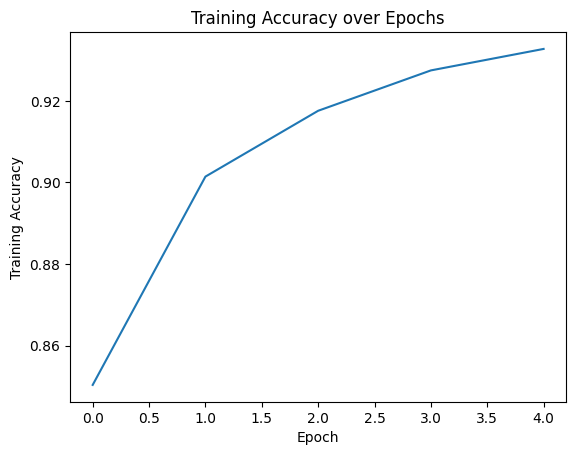

In [36]:
from matplotlib import pyplot as plt

plt.plot(history.history['accuracy']);
plt.xlabel('Epoch')
plt.ylabel('Training Accuracy')
plt.title('Training Accuracy over Epochs')
plt.show()

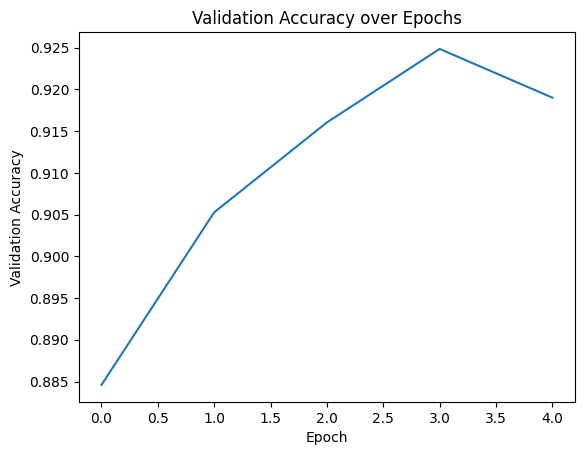

In [37]:
from matplotlib import pyplot as plt

plt.plot(history.history['val_accuracy']);
plt.xlabel('Epoch')
plt.ylabel('Validation Accuracy')
plt.title('Validation Accuracy over Epochs')
plt.show()

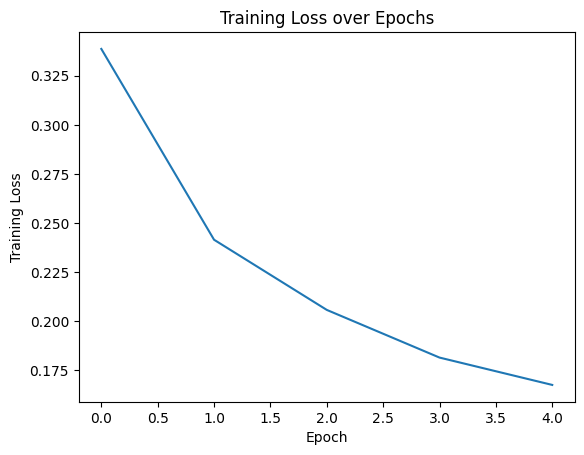

In [38]:
plt.plot(history.history['loss']);
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.title('Training Loss over Epochs')
plt.show()

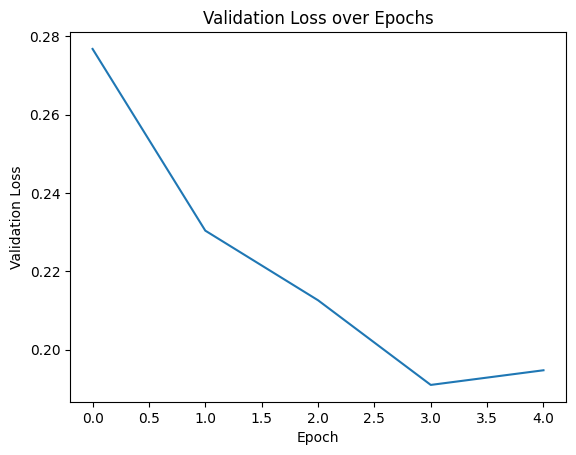

In [39]:
plt.plot(history.history['val_loss']);
plt.xlabel('Epoch')
plt.ylabel('Validation Loss')
plt.title('Validation Loss over Epochs')
plt.show()

## Reviewing the results
We notice from the graphs of our first approach that our models need more epochs to stablize.

In [40]:
# The model weights (that are considered the best) can be loaded as -
model_2.load_weights("/kaggle/working/models/checkpoint.model_2.keras")

In [41]:
predictions = model_2.predict(test_dataset)
predictions

30000/30000 ━━━━━━━━━━━━━━━━━━━━ 297s 10ms/step


array([[8.6193839e-05, 9.9991381e-01],
       [4.2962726e-02, 9.5703727e-01],
       [1.0526924e-04, 9.9989474e-01],
       ...,
       [9.9999917e-01, 8.0849196e-07],
       [9.9550593e-01, 4.4940342e-03],
       [9.9841881e-01, 1.5812253e-03]], dtype=float32)

In [42]:
test_dataset.class_indices

{'AI': 0, 'human': 1}

In [43]:
predictions = np.argmax(predictions, axis = 1)
predictions

array([1, 1, 1, ..., 0, 0, 0])

              precision    recall  f1-score   support

           0       0.93      0.95      0.94     20000
           1       0.90      0.87      0.88     10000

    accuracy                           0.92     30000
   macro avg       0.91      0.91      0.91     30000
weighted avg       0.92      0.92      0.92     30000



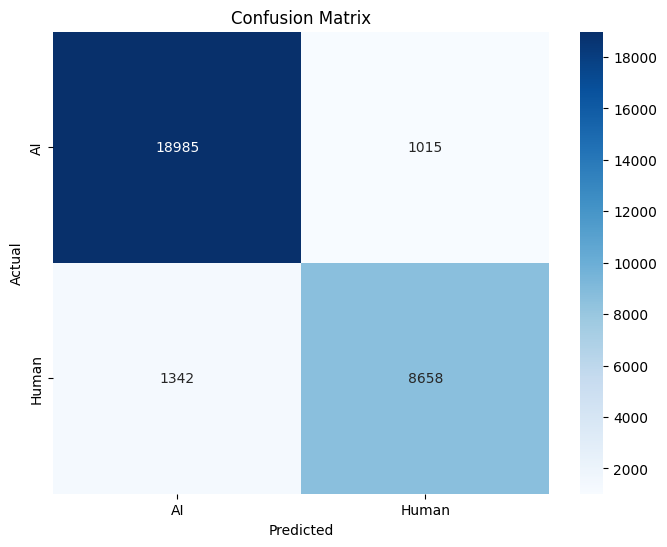

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

# Calculate confusion matrix and classification report
cm = confusion_matrix(test_dataset.classes, predictions)
report = classification_report(test_dataset.classes, predictions)

# Define custom labels for the axes
labels = ['AI', 'Human']
cm_df = pd.DataFrame(cm, index=labels, columns=labels)

# Plot confusion matrix using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')

# Add labels to the axes
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

# Print classification report
print(report)

# Show the plot
plt.show()